# <center> Projet 6 : Classifiez automatiquement des biens de consommation
    Notebook Données textes

**Introduction:**

La marketplace e-commerce "Place de marche" souhaite étudier la faisabilité d'un moteur de classification des articles mis en place par les vendeurs. Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs et est donc peu fiable. De plus, le volume des articles est pour l’instant très petit.

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.

On va donc devoir faire un prétraitement des description, des produits et leurs images dans le but de réaliser un clustering.

# 1. Importation des modules et données

In [74]:
import warnings
warnings.simplefilter('ignore')

In [75]:
# Librairies import
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install sacremoses

Note: you may need to restart the kernel to use updated packages.


**Créer les dataframes requises pour l'analyse :**
- Ce jeu de données est un extrait du jeu de données d'un site de e-commerce indien FlipKart.
- Nous avons utilisé la fonction pd.read_csv() pour convertir le fichier .csv en dataframes pandas.

In [80]:
# Load datasets
data = pd.read_csv("C:\\Users\\Marwa\\Downloads\\Projet_6\\Dataset+projet+prétraitement+textes+images\\Flipkart\\flipkart_com-ecommerce_sample_1050.csv", sep=',', encoding ='utf-8')

In [81]:
pd.options.display.max_rows = 999

Les données se décomposent en 1 fichier(s)

# 2. Description des données

In [82]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [144]:
# Taille : nombre de lignes/colonnes
nRow, nVar = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 1050 lignes et 15 variables.


In [84]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [85]:
data.describe(include='all')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1049.000000,1049.000000,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,NaN,NaN,1050,2,1050,27,27,490,984
top,96bc1fbb83ad5a2c0441d132fe8bcf97,2015-12-01 12:40:44 +0000,http://www.flipkart.com/kalash-kadhai-3-5-l/p/...,Prithish Eye Abstract Painting Ceramic Mug,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",RUGEHCDG6DKDUCDZ,NaN,NaN,c9531b92270ef77516d5b5b7ba2568e9.jpg,False,Key Features of Bharatcraft Showpiece - 5 cm...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,NaN,NaN,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,NaN,2186.197331,1584.527169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7639.229411,7475.099680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,555.000000,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,999.000000,600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,1199.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Clés uniques : uniq_id, product_url, product_name, pid, image, description.
- Variables avec des valeurs manquantes : retail_price, discounted_price, brand, product_specifications 

**Données manquantes**

In [86]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

- Le jeu de données comporte peu de valeurs manquantes (~ 2%), seule la variable 'brand' comporte beaucoup de valeurs manquantes.

**Données dupliquées**

In [87]:
data.duplicated().sum()

0

- Le jeu de données ne comporte pas de valeurs dupliquées.

**Bilan de description**

Data est composé de :

- un fichier .csv des descriptions et des categories.
- un fichier image.

- **uniq_id** et **pid** sont des clés uniques, peu explicites et ne nous permettent pas de trouver la catégorie du produit.
- **product_url** est une clé unique qui contient des informations sur le produit permettant de le catégoriser mais les informations sont les mêmes que celles de la variables 'description'.
- La variable **product_name** est unique et explicite, on la conservera comme clé primaire du produit.


- Variables non conservées : **uniq_id**, **pid** et **product_url**, **crawl_timestamp**.
- Variable conservée comme clé unique : **product_name**.

- **Description** : Description textuelle du produit pour une compréhension de l'utilisateur.
- **Brand** : marque du produit qui peut donner des informations sur la catégorie du produit.
- **product_specifications** : Spécifications du produit

Autres variables - Inutiles pour la classification des catégories:
- **retail_price** : le prix de consommation peut indiquer si le produit est onéreux ou pas donc une idée de la catégorie mais aucune exploitation associée au texte ou à l'image.
- **discounted_price** : le prix réduit peut indiquer si le produit est onéreux ou pas donc une idée de la catégorie mais aucune exploitation associée au texte ou à l'image.
- **is_FK_Advantage_product** : booléen dont on ne peut tirer aucune information de texte ou d'image.
- **product_rating** : note du produit dont on ne peut tirer aucune information de texte ou d'image.
- **overall_rating** : note moyenne globale du produit dont on ne peut tirer aucune information de texte ou d'image

Ces variables ne seront pas conservées. On gardera uniquement les variables **Description**, **product_name** et **product_category_tree**.

# 3. Prétraitement des données textes

Préparation des données, les rendant exploitables pour l'automatisation des catégorisation.

###  Categories

Dépliage des catégories à l'aide de la colonne 'product_category_tree'

In [88]:
# vérification de la colonne catégorie

data['product_category_tree'][743]

'["Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Water bottle >> Nutcase Water bottle"]'

La variable product_category_tree est constituée de plusieurs sous-catégories de produits séparées par des chevrons.

Exemple : Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...

**Profondeur des sous-catégories**

In [89]:
# Détermination de la profondeur maximale de l'arborescence des catégories

ser_depth = data['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

In [90]:
# Conversion des strings dans la colonne 'product_category_tree' en 6 colonnes categ

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = data['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
data_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=data.index)

In [91]:
# imprission du nombre de catégories dans chaque niveau
display(data_cat_level.nunique(), data_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5
166,Kitchen & Dining,Kitchen & Dining/Coffee Mugs,Kitchen & Dining/Coffee Mugs/Prithish Coffee Mugs,Kitchen & Dining/Coffee Mugs/Prithish Coffee M...,Kitchen & Dining/Coffee Mugs/Prithish Coffee M...,Kitchen & Dining/Coffee Mugs/Prithish Coffee M...
670,Baby Care,Baby Care/Baby & Kids Gifts,Baby Care/Baby & Kids Gifts/Photo Frames,Baby Care/Baby & Kids Gifts/Photo Frames/MH Ph...,Baby Care/Baby & Kids Gifts/Photo Frames/MH Ph...,Baby Care/Baby & Kids Gifts/Photo Frames/MH Ph...
86,Kitchen & Dining,Kitchen & Dining/Cookware,Kitchen & Dining/Cookware/Pots & Pans,Kitchen & Dining/Cookware/Pots & Pans/Pans & T...,Kitchen & Dining/Cookware/Pots & Pans/Pans & T...,Kitchen & Dining/Cookware/Pots & Pans/Pans & T...


Voyons combien d'articles sont dans chaque catégorie.

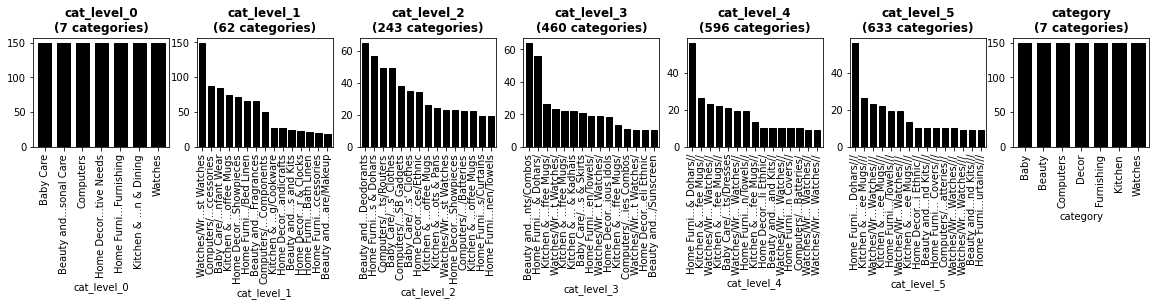

In [156]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(20,2))
for i, col in enumerate(data_cat_level.columns,1):
    # plot the graphs
    ax = fig.add_subplot(1,len(data_cat_level.columns), i)
    ser = data_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.7, color='black', ec='k', ax=ax)
    # shorten the labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # set title
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

Le seul niveau qui a un ensemble équilibré d'éléments est le niveau 0, avec 7 catégories. 

Renommons ces 7 catégories :

In [93]:
data_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [94]:
data_cat_level['category'] = \
    data_cat_level['cat_level_0'].replace({'Home Furnishing': 'Furnishing',
                                         'Baby Care': 'Baby', 
                                         'Watches': 'Watches',
                                         'Home Decor & Festive Needs': 'Decor',
                                         'Kitchen & Dining': 'Kitchen',
                                         'Beauty and Personal Care': 'Beauty',
                                         'Computers': 'Computers'})

Le niveau 1 des catégories sera utilisé pour la suite de l'analyse.

In [95]:
data_cat_level['category'].head()

0    Furnishing
1          Baby
2          Baby
3    Furnishing
4    Furnishing
Name: category, dtype: object

In [96]:
data_cat_level.shape

(1050, 7)

###  Description et product name

In [97]:
data_desc = data["product_name"] + data["description"]

In [98]:
#join

data_desc = pd.DataFrame(data["product_name"] + data["description"])
data_desc.rename(columns={0:"product"}, inplace=True)

In [99]:
data_desc.shape

(1050, 1)

In [100]:
data_desc['category'] = data_cat_level['category']

In [101]:
data_desc.head()

,product,category
0,Elegance Polyester Multicolor Abstract Eyelet ...,Furnishing
1,Sathiyas Cotton Bath TowelSpecifications of Sa...,Baby
2,Eurospa Cotton Terry Face Towel SetKey Feature...,Baby
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,Furnishing


## Nettoyage du texte

Les fonctions de nettoyage utilisées seront les suivantes :

**Tokenisation**

Pemière phase de définition de l'objet de l'analyse : 
- la tokenisation des textes qui consiste à identifier les unités de textes élémentaires (tokens) qui peuvent être des mots, mais aussi des lettres, des syllabes, des phrases, ou des séquences de ces éléments.
- Si les mots sont des unités de sens évidentes, les paires, les triplets de mots le sont aussi (n-grammes).
- à partir de ces tokens, l'analyse de la fréquence des mots peut être effectuée pour construire un dictionnaire permettant de filtrer les tokens selon leurs fréquences.
- les tokens les plus fréquents qui n'apportent donc aucune information sont supprimés.
- les tokens très peu fréquents qui apportent une information singulière sont également supprimés.

**Normalisation**

Deuxième phase de lissage, correction et nettoyage des données textuelles :
- Mettre le texte en minuscule, mais au risque de perdre les capitales initiales qui indicent les noms communs,  
- supprimer la ponctuation, mais du même coup peut déstructurer les phrases, 
- éliminer les nombres et dates, 
- repérer (et éliminer) les liens URL et les mentions de personnes
- éliminer aussi les mots sans signification que l’anglais dénomme par “stopwords” avec des dictionnaires, 
- repérer et traiter les émoticônes...

**Lemmatisation**

- Le processus de **lemmatisation** consiste à représenter les mots (ou lemmes) sous leur forme canonique pour ne conserver que le sens des mots utilisés dans le corpus.
- Par exemple pour un verbe, ce sera son infinitif, pour un nom, son masculin singulier. 


**Racinalisation**

- La **racinisation**(ou **stemming** en anglais) consiste à ne conserver que la racine des mots étudiés. 
- L'idée étant de supprimer les suffixes, préfixes et autres des mots afin de ne conserver que leur origine. 
- C'est un procédé plus simple que la lemmatisation et plus rapide à effectuer puisqu'on tronque les mots essentiellement contrairement à la lemmatisation qui nécessite d'utiliser un dictionnaire.

In [102]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import io
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lowercase et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idata_T0, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text
# Description
data_desc['description_bow'] = data_desc['product'].apply(lambda x : transform_bow_fct(x))
data_desc['description_bow_lem'] = data_desc['product'].apply(lambda x : transform_bow_lem_fct(x))
data_desc['description_dl'] = data_desc['product'].apply(lambda x : transform_dl_fct(x))
data_desc.shape

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(1050, 5)

In [103]:
data_desc.columns

Index(['product', 'category', 'description_bow', 'description_bow_lem',
       'description_dl'],
      dtype='object')

In [104]:
data_desc.head()

,product,category,description_bow,description_bow_lem,description_dl
0,Elegance Polyester Multicolor Abstract Eyelet ...,Furnishing,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...
1,Sathiyas Cotton Bath TowelSpecifications of Sa...,Baby,sathiyas cotton bath towelspecifications sathi...,sathiyas cotton bath towelspecifications sathi...,sathiyas cotton bath towelspecifications of sa...
2,Eurospa Cotton Terry Face Towel SetKey Feature...,Baby,eurospa cotton terry face towel setkey feature...,eurospa cotton terry face towel setkey feature...,eurospa cotton terry face towel setkey feature...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Furnishing,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...
4,Jaipur Print Cotton Floral King sized Double B...,Furnishing,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...


In [105]:
# #save dataset
# data_desc_cat.to_csv("C:\\Users\\Marwa\\Downloads\\Projet_6\\dataset2_clean.csv")

# Préparation commune des traitements

In [106]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [107]:
l_cat = list(set(data_desc['category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_desc.iloc[i]['category'])) for i in range(len(data_desc))]

catégories :  ['Decor', 'Beauty', 'Baby', 'Computers', 'Furnishing', 'Kitchen', 'Watches']


In [108]:
data_T = data_desc.copy(deep=True)

In [109]:
data_desc.columns

Index(['product', 'category', 'description_bow', 'description_bow_lem',
       'description_dl'],
      dtype='object')

In [110]:
from nltk.tokenize import sent_tokenize, word_tokenize
# Description
print("*********Description********")
data_T['desc_length_bow'] = data_T['description_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['desc_length_bow'].max())
data_T['desc_length_dl'] = data_T['description_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['desc_length_bow'].max())

*********Description********
max length bow :  383
max length dl :  383


# 4. Extraction des features

## Fonctions communes

In [111]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


Pour la TSNE, on a fixé les paramètres learning_rate=200 et n_iter=2000, le nombre de composants par défaut (2) et pour perplexité=30.

Clustering KMeans avec 7 clusters (=nombre de catégories).

# Bag of word 

**BOW - Bags of words - CountVectorizer**

- CountVectorizer convertit une collection de documents texte en une matrice de comptage de tokens : les occurrences des tokens dans chaque document. 
- Cette implémentation produit une représentation éparse, creuse du nombre de tokens.
- La fonction "count vectorizer" de la librairie scikit-learn de Python, fournit un index à chaque mot et génère un vecteur qui contient le nombre d'apparitions de chaque mot dans un morceau de texte.
- fit permet d'apprendre le vocabulaire d'un ensemble de textes.
- transform permet la transformation en un cadre de données pouvant être utilisé pour construire des modèles de machine learning.

**Hyperparamètres** :
- **stop_words** : Étant donné que CountVectorizer ne compte que les occurrences de chaque mot de son vocabulaire, des mots extrêmement courants comme " le ", " et ", etc. deviendront des caractéristiques très importantes alors qu'ils ajoutent peu de sens au texte. Votre modèle peut souvent être amélioré si vous ne tenez pas compte de ces mots. Les mots d'arrêt sont simplement une liste de mots que vous ne voulez pas utiliser comme caractéristiques. Vous pouvez définir le paramètre stop_words='english' pour utiliser une liste intégrée. Vous pouvez également définir stop_words comme une liste personnalisée. Ce paramètre a la valeur par défaut None.
- **ngram_range** : Un n-gram est juste une chaîne de n mots à la suite. Par exemple, la phrase 'I am Groot' contient les 2-grammes 'I am' et 'am Groot'. La phrase est elle-même un 3-gramme. Définissez le paramètre ngram_range=(a,b) où a est la taille minimale et b est la taille maximale des ngrams que vous voulez inclure dans vos caractéristiques. La plage ngram_range par défaut est (1,1).
- **min_df**, **max_df** : Ce sont les fréquences minimales et maximales des documents que les mots/n-grammes doivent avoir pour être utilisés comme caractéristiques. Si l'un ou l'autre de ces paramètres est défini comme un nombre entier, il sera utilisé comme limite au nombre de documents dans lesquels chaque caractéristique doit se trouver pour être considérée comme une caractéristique. Si l'un ou l'autre est défini comme un flottant, ce nombre sera interprété comme une fréquence plutôt qu'une limite numérique. min_df a la valeur 1 (int) par défaut et max_df a la valeur 1.0 (flottant) par défaut.
- **max_features** : Ce paramètre est assez explicite. Le CountVectorizer choisira les mots/caractéristiques qui apparaissent le plus fréquemment dans son vocabulaire et laissera tomber tout le reste.

**BOW - TfidfVectorizer**

- Une transformation tf-idf (term frequency-inverse document frequency), permet de pondérer les fréquences d’apparition des termes par leur nombre d’occurrences dans l’ensemble des documents.
- La pondération tf-idf permet de contrebalancer l’importance d’un mot utilisé très fréquemment dans tous les documents du corpus par rapport aux termes plus spécifiques à certains documents. 
- TF-IDF est un produit de deux parties :
    - TF (Term Frequency) - Elle est définie comme le nombre de fois qu'un mot apparaît dans une phrase donnée.
    - IDF (Inverse Document Frequency) - Il est défini comme le logarithme à la base e du nombre total de documents divisé par les documents dans lesquels le mot apparaît.

## Préparation sentences

In [112]:
# création du bag of words (CountVectorizer et Tf-idata_T0)

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat1 = 'description_bow_lem'
#feat2='product_name_bow_lem'
cv_fit1 = cvect.fit(data_T[feat1])
ctf_fit1 = ctf.fit(data_T[feat1])
cv_transform1 = cvect.transform(data_T[feat1])  
ctf_transform1 = ctf.transform(data_T[feat1])  

## Exécution des modèles

### Description

In [113]:
print("********Description************")
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform1)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform1)

********Description************
CountVectorizer : 
-----------------
ARI :  0.4627 time :  10.0

Tf-idf : 
--------
ARI :  0.5417 time :  9.0


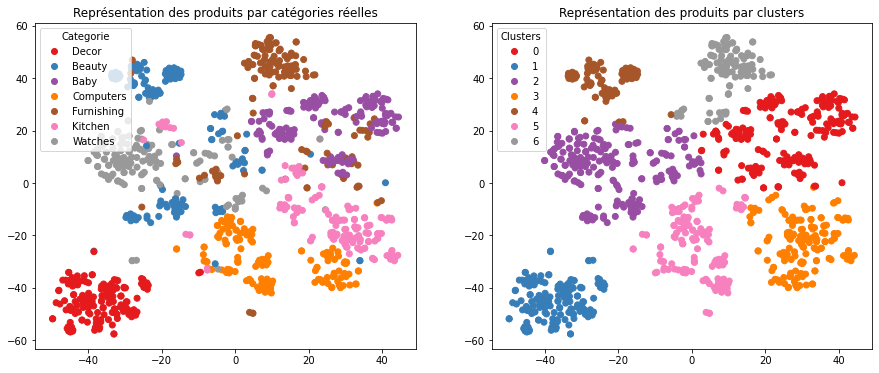

ARI :  0.5417


In [114]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

- groupes plus homogènes pour perplexité=30

- Répartition inégale (2 petits clusters), les vraies catégories sont mélangées dans les clusters, le score ARI est élevé.
- Ce combinaison TSNE Tf-idf + description lemmatisée parvient à retrouver les 7 catégories comme le souhaite notre client.

Le score ARI est encore grand.
Les 7 catégories sont bien trouvées avec cependant quelques mélanges :

- Cluster 0 : Baby
- Cluster 1 : Decor
- Cluster 2 : Watches
- Cluster 3 : Kitchen
- Cluster 4 : Beauty
- Cluster 5 : Computers
- Cluster 6 : Furnishing

# Word2Vec

- Il s'agit d'un ensemble de modèles de réseaux de neurones développés par google qui ont pour but de représenter les mots dans l'espace vectoriel. 
- Ces modèles sont très efficaces et performants pour comprendre le contexte et la relation entre les mots. Les mots similaires sont placés près les uns des autres dans l'espace vectoriel, tandis que les mots dissemblables sont placés loin les uns des autres.
- Il existe deux modèles dans cette classe (un réseau de neurones à 3 couches : 1 couche d’entrée, 1 couche cachée, 1 couche de sortie) :
    - CBOW (Continuous Bag of Words) : Le réseau neuronal examine les mots environnants (disons 2 à gauche et 2 à droite) et prédit le mot qui se trouve entre les deux.
        - 1. La couche Embedding va transformer chaque mot du contexte en vecteur d’embedding. La matrice W de l’embedding sera apprise au fur et à mesure que le modèle s’entraîne. Les dimensions résultantes sont : (lot, context_size, embedding).
        - 2. Ensuite, la couche GlobalAveragePooling1D permet de sommer les différents embedding pour avoir une dimension en sortie (batch_size, embedding).
        - 3.Enfin, La couche Dense de taille « voc_size » permet de prédire le mot cible.
    - Skip-grams : Le réseau neuronal prend un mot et essaie ensuite de prédire les mots environnants.
- Le réseau neuronal possède une couche d'entrée, une couche cachée et une couche de sortie pour s'entraîner sur les données et construire les vecteurs. 

**Hyperparametres**
- **min_count** = int - Ignore tous les mots dont la fréquence absolue totale est inférieure à cette valeur - (2, 100)
- **window** = int - La distance maximale entre le mot actuel et le mot prédit dans une phrase. Par exemple, les mots fenêtre à gauche et les mots fenêtre à gauche de notre cible - (2, 10)
- **size** = int - Dimensionnalité des vecteurs de caractéristiques. - (50, 300)
- **sample** = float - Le seuil pour configurer quels mots à haute fréquence sont aléatoirement sous-échantillonnés. Très influent. - (0, 1e-5)
- **alpha** = float - Le taux d'apprentissage initial - (0.01, 0.05)
- **min_alpha** = float - Le taux d'apprentissage diminuera linéairement jusqu'à min_alpha au fur et à mesure de l'apprentissage. Pour le définir : alpha - (min_alpha * epochs) ~ 0.00
- **negative** = int - Si > 0, un échantillonnage négatif sera utilisé, l'int pour negative spécifie combien de "mots de bruit" doivent être noyés. Si la valeur est 0, aucun échantillonnage négatif n'est utilisé. - (5, 20)
- **workers** = int - Utilisez ce nombre de threads pour entraîner le modèle (=entraînement plus rapide avec des machines multicœurs).
- **sg** : L'algorithme de formation, soit CBOW(0) ou skip gram(1). L'algorithme d'apprentissage par défaut est CBOW.

In [115]:
pip uninstall -y tensorflow-gpu

Found existing installation: tensorflow-gpu 2.9.1
Uninstalling tensorflow-gpu-2.9.1:
  Successfully uninstalled tensorflow-gpu-2.9.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\Marwa\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self

In [116]:
pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.9.1-cp38-cp38-win_amd64.whl (444.1 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow 2.8.2 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.1 which is incompatible.
tensorflow 2.8.2 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 2.9.0 which is incompatible.


In [117]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

#### Création du modèle Word2vec

In [118]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['description_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [119]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5062
Word2Vec trained


In [120]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5063


#### Création de la matrice d'embedding

In [121]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5063, 300)


#### Création du modèle

In [122]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 24, 300)           1518900   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,518,900
Trainable params: 1,518,900
Non-trainable params: 0
_________________________________________________________________


#### Execution du modèle

In [123]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [124]:
print("********Description************")
ARI, X_tsne, labels = ARI_fct(embeddings)

********Description************
ARI :  0.254 time :  8.0


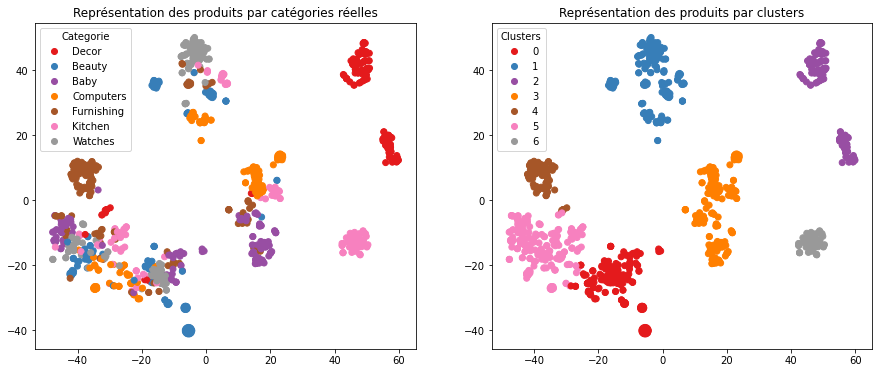

ARI :  0.254


In [125]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

- Répartition inégale (3 petits clusters), les vraies catégories sont mélangées dans les clusters, le score ARI est faible.
- Ce combinaison TSNE Word2Vec + description lemmatisée ne parvient pas à retrouver les 7 catégories comme le souhaite notre client.
- Le modèle présenté precédement (Bag of word-idf) donne des meilleurs résultats.




# BERT

BERT c'est pour **Bidirectional Encoder Representations from Transformers**. Il est sorti des labos Google AI fin 2018, et s'il est ce jour l'objet de notre attention c'est que son modèle est à la fois :

- Plus performant que ses prédécesseurs en terme de résultats.
- Plus performant que ses prédécesseurs en terme de rapidité d'apprentissage.
- Une fois pré-entraîné, de façon non supervisée (initialement avec tout - absolument tout - le corpus anglophone de Wikipedia), il possède une "représentation" linguistique qui lui est propre. Il est ensuite possible, sur la base de cette représentation initiale, de le customiser pour une tâche particulière. Il peut être entraîné en mode incrémental (de façon supervisée cette fois) pour spécialiser le modèle rapidement et avec peu de données.
- Enfin il peut fonctionner de façon multi-modèle, en prenant en entrée des données de différents types comme des images ou/et du texte, moyennant quelques manipulations.

Source : https://lesdieuxducode.com/blog/2019/4/bert--le-transformer-model-qui-sentraine-et-qui-represente

In [126]:
!pip install transformers[tf-cpu]

In [127]:
data_B = data_T.copy()

In [128]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
#from transformers import *
from transformers import AutoModel, AutoTokenizer, TFAutoModel

os.environ["TF_KERAS"]='1'

In [129]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


## Fonctions communes

In [130]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

Quelle est la différence entre BERT base cased and uncased?

Pour BERT uncased, le texte a été mis en minuscules avant l'étape de tokenization WordPiece tandis que dans BERT cased, le texte est identique au texte d'entrée (pas de changement)

### BERT base uncased  

#### Description

In [131]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_B['description_dl'].to_list()

In [132]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 689ms/step
temps traitement :  88.0


In [133]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.4642 time :  12.0


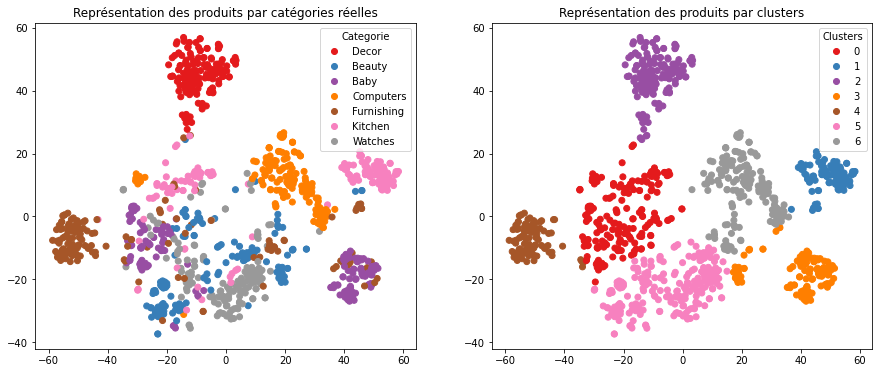

ARI :  0.4642


In [134]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

- Répartition inégale (3 petits clusters), les vraies catégories sont mélangées dans les clusters, le score ARI est élevé.
- Cette combinaison TSNE BERT + description lemmatisée parvient à retrouver les 7 catégories comme le souhaite notre client.
- Le modèle bag of word-itf donne les meilleurs résulats jusqu'a présent

# USE - Universal Sentence Encoder

**Universal Sentence Encoder** encode le texte en vecteurs de grande dimension qui peuvent être utilisés pour la classification de texte, la similarité sémantique, le regroupement et d'autres tâches de langage naturel.

Le modèle est entraîné et optimisé pour les textes de plus d'un mot, tels que les phrases, les expressions ou les paragraphes courts. Il est formé sur une variété de sources de données et une variété de tâches dans le but de s'adapter dynamiquement à une grande variété de tâches de compréhension du langage naturel. L'entrée est un texte anglais de longueur variable et la sortie est un vecteur de 512 dimensions. Nous appliquons ce modèle au benchmark STS pour la similarité sémantique, et les résultats peuvent être vus dans l'exemple de cahier mis à disposition. Le modèle d'encodeur de phrases universelles est formé avec un encodeur de réseau de moyenne profonde (DAN).

Source : https://tfhub.dev/google/universal-sentence-encoder/4

In [135]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model



os.environ["TF_KERAS"]='1'

In [136]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


In [137]:
embed = hub.load("C:\\Users\\Marwa\\Downloads\\Projet_6\\")

In [138]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

### Description

In [139]:
batch_size = 10
sentences = data_T['description_dl'].to_list()

In [140]:
features_USE = feature_USE_fct(sentences, batch_size)

In [141]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4453 time :  11.0


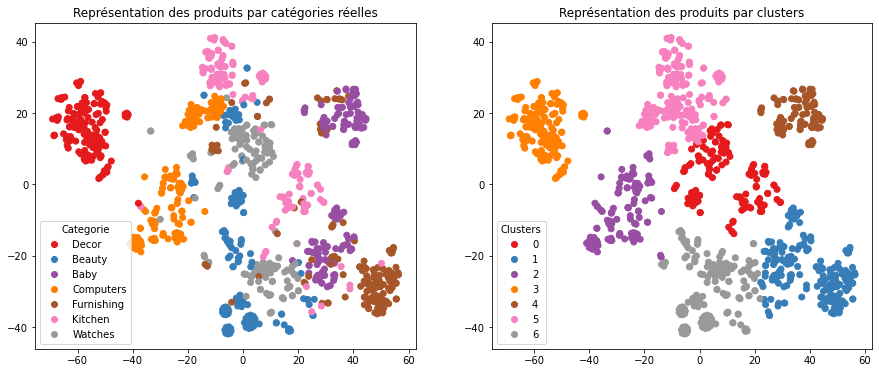

ARI :  0.4453


In [142]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

- Répartition inégale (3 petits clusters), les vraies catégories sont mélangées dans les clusters, le score ARI est élevé.
- Cette combinaison TSNE USE + description lemmatisée ne parvient pas à retrouver les 7 catégories comme le souhaite notre client.
- Le modèle présenté precédement (Bag of word-idf) donne toujours des meilleurs résultats.

# Conclusion

- Pour les méthodes traditionnelles de Words Embeddings, le meilleur résultat (ARI) est obtenu à partir des données 'description' + 'product_name', avec une lemmatisation ou une racinisation, en utilisant une réduction de dimension t-SNE et une transformation BOW avec TfidfVectorizer.

- On voit que les topics identifiés sont assez disparates :

  -  certains semblent assez homogènes avec une catégorie fortement présente
  -  d'autres semblent assez hétérogènes avec de nombreuses catégorise représentées